# Data 620 - Project 1 

For your first project, you are asked to

1- Identify and load a network dataset that has some categorical information available for each node. 
2- For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality. 
3- Compare your centrality measures across your categorical groups.

For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.htm], you might want to determine if there are any differences in your calculated centrality measures between the two sexes.  You might use a t-test or another statistical measure to support your findings.

Group members: Habib Khan, Vijaya Cherukuri, Priya Shaji, Abdellah Ait Elmouden

# Game of Thrones 

If you haven't heard of Game of Thrones, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series A Song of Ice and Fire by George R.R. Martin. In this notebook, we will analyze the co-occurrence network of the characters in the Game of Thrones books. Here, two characters are considered to co-occur if their names appear in the vicinity of 15 words from one another in the books.

This dataset constitutes a network and is given as a text file describing the edges between characters, with some attributes attached to each edge. Let's start by loading in the data for the first book A Game of Thrones and inspect it.

In [64]:
# loading libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np                                                               
#import matplotlib.image as mpimg
from PIL import Image

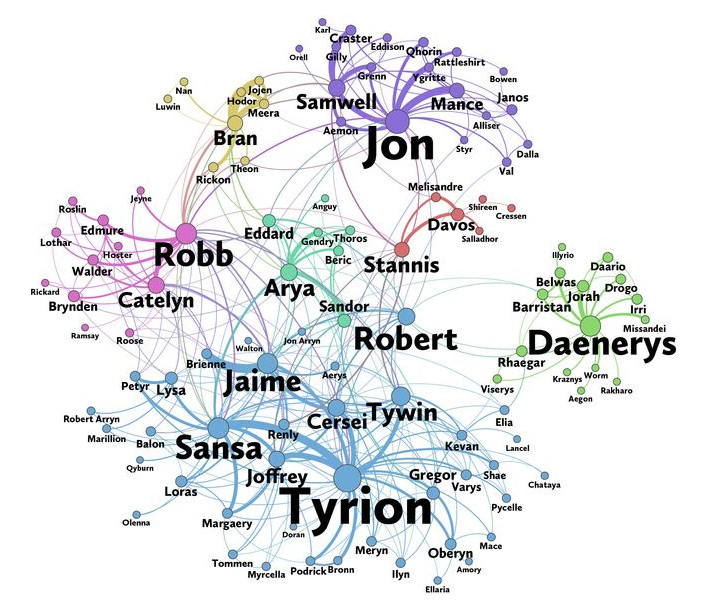

In [2]:
# Loading the famous png of Game of Throne's network analysis
img = Image.open('got_network.png')
img

In [3]:
# Loading dataset - Book 1 
def file(url):
    fun = pd.read_csv(url, sep=',')
    got1 = fun.head()
    got1
    return fun

got1 = file('https://raw.githubusercontent.com/habibkhan89/Data620/master/Project%201/Game%20of%20Thrones/Dataset/book1.csv')
got1

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


For this project, we will continue working on first book of Game of Thrones otherwise the data will become very densed. As shown above that the type of mode in this dataset is undirected which means the nodes are connected together where all the links or edges are bidirectional. 

This dataset has five columns which are Source, Target, Type, weight and book. Source and Target are the characters in Game of Thrones - Book1 and their relationship is bidirectional. Weight refers to the strength of relationship between the characters. The more the weight is the stronger their relationship is. Book refers to part 1 in this dataset as our project is limited only to the part 1 of GoT.

In [4]:
# Creating an empty graph
got = nx.Graph()
type(got)

networkx.classes.graph.Graph

In [5]:
# Creating source, target and weight 
for _, edge in got1.iterrows():
    got.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [6]:
# All the edges
print("The number of total edges is ", got.number_of_edges())
edges = pd.DataFrame(list(got.edges()))
edges.columns = ['Source', 'Target']
edges.head(10)

The number of total edges is  684


,Source,Target
0,Addam-Marbrand,Jaime-Lannister
1,Addam-Marbrand,Tywin-Lannister
2,Jaime-Lannister,Aerys-II-Targaryen
3,Jaime-Lannister,Barristan-Selmy
4,Jaime-Lannister,Brynden-Tully
5,Jaime-Lannister,Catelyn-Stark
6,Jaime-Lannister,Cersei-Lannister
7,Jaime-Lannister,Eddard-Stark
8,Jaime-Lannister,Edmure-Tully
9,Jaime-Lannister,Galbart-Glover


In [7]:
# Tail edges
edges.tail(n=10)

,Source,Target
674,Danwell-Frey,Jared-Frey
675,Hosteen-Frey,Jared-Frey
676,Daryn-Hornwood,Torrhen-Karstark
677,Jommo,Ogo
678,Ogo,Fogo
679,Galbart-Glover,Roose-Bolton
680,Wyl-(guard),Heward
681,Gared,Will-(prologue)
682,Jyck,Morrec
683,Mace-Tyrell,Paxter-Redwyne


In [8]:
print("Total number of nodes is ", got.number_of_nodes())
nodes = pd.DataFrame(list(got.nodes()))
nodes.columns = ['Nodes']
nodes.head(n=10)

Total number of nodes is  187


,Nodes
0,Addam-Marbrand
1,Jaime-Lannister
2,Tywin-Lannister
3,Aegon-I-Targaryen
4,Daenerys-Targaryen
5,Eddard-Stark
6,Aemon-Targaryen-(Maester-Aemon)
7,Alliser-Thorne
8,Bowen-Marsh
9,Chett


In [9]:
# Tail
nodes.tail(n=10)

,Nodes
177,Lancel-Lannister
178,Leo-Lefford
179,Mace-Tyrell
180,Lyn-Corbray
181,Paxter-Redwyne
182,Maegor-I-Targaryen
183,Mord
184,Randyll-Tarly
185,Timett
186,Ulf-son-of-Umar


Text(0.5, 1.0, 'Network analysis of Game of Thrones - Book 1')

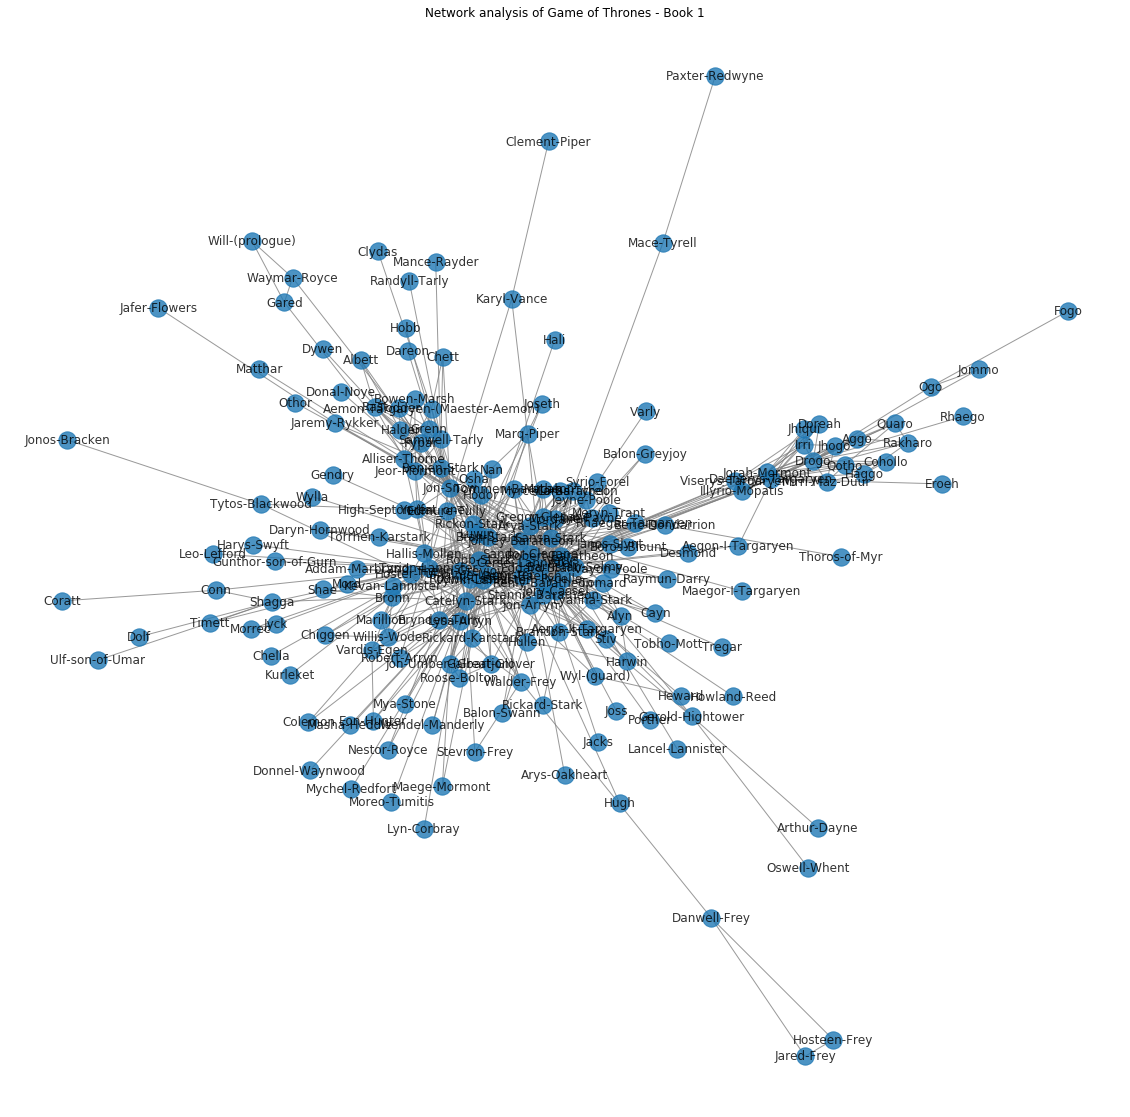

In [14]:
# Creating a network analysis
plt.figure(figsize=(20,20))
plt.axis('off')

nx.draw(got, with_labels=True, alpha=0.8, edge_color="Gray", seed=2)

plt.title("Network analysis of Game of Thrones - Book 1")

# Calculations

We'll compare different centralities to find the importance of nodes in this network. There is no one right way of calaculating it, every approach has a different meaning.

In [15]:
# Creating a dataframe with nodes and their required calculations
cal = pd.DataFrame()
cal['eigen_cent'] = nx.eigenvector_centrality(got).values()
cal['degree_cent'] = nx.degree_centrality(got).values()
cal['between_cent'] = nx.betweenness_centrality(got).values()
cal['close_centr'] = nx.closeness_centrality(got).values()

# Printing results
cal.index = list(got)
print(cal.to_string())

                                 eigen_cent  degree_cent  between_cent  close_centr
Addam-Marbrand                     0.016907     0.010753      0.000000     0.323478
Jaime-Lannister                    0.194958     0.155914      0.032010     0.461538
Tywin-Lannister                    0.139390     0.118280      0.026190     0.449275
Aegon-I-Targaryen                  0.017385     0.010753      0.000000     0.376518
Daenerys-Targaryen                 0.047389     0.112903      0.086270     0.405229
Eddard-Stark                       0.296409     0.354839      0.269604     0.563636
Aemon-Targaryen-(Maester-Aemon)    0.015729     0.037634      0.010845     0.336957
Alliser-Thorne                     0.028846     0.053763      0.005027     0.363281
Bowen-Marsh                        0.015170     0.026882      0.000000     0.335740
Chett                              0.010824     0.016129      0.000000     0.333333
Clydas                             0.000795     0.005376      0.000000     0

In [50]:
# Most popular characters
# Most important character in Game of Throne
cal.sort_values('eigen_cent', ascending=False)

,eigen_cent,degree_cent,between_cent,close_centr
Eddard-Stark,0.296409,0.354839,0.269604,0.563636
Robert-Baratheon,0.269488,0.268817,0.214030,0.545455
Sansa-Stark,0.231550,0.188172,0.037145,0.489474
Tyrion-Lannister,0.225204,0.247312,0.190212,0.510989
Joffrey-Baratheon,0.220754,0.161290,0.018949,0.480620
...,...,...,...,...
Paxter-Redwyne,0.000276,0.005376,0.000000,0.222754
Clement-Piper,0.000254,0.005376,0.000000,0.225728
Jared-Frey,0.000100,0.010753,0.000000,0.211124
Hosteen-Frey,0.000100,0.010753,0.000000,0.211124


### Plot a bar graph of degree centrality

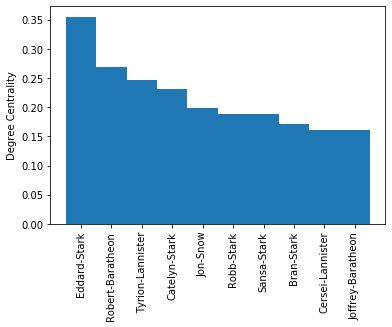

In [71]:
top_10 = sorted(nx.degree_centrality(got).items(), key=lambda x:x[1], reverse=True)[0:10] # Sort the top 10

labels, ys = zip(*top_10)
xs = np.arange(len(labels)) 
width = 1
plt.bar(xs, ys, width, align='center')
#plt.bar(top_10.keys, top_10.values, align='center')
plt.xticks(xs, labels, rotation='vertical') 
plt.ylabel('Degree Centrality')
plt.show()


According to the analysis, Eddard-Start, Robert-Baratheon and Sansa-Stark are the most popular characters in the first part of Game of Thrones. Hosteen-Frey and Fogo are the least popular characters in GoT 1.

In [16]:
# creating graphml 
(got, 'got_graphml.graphml')

(<networkx.classes.graph.Graph at 0x7f050b92fed0>, 'got_graphml.graphml')

# Conclusion

Game of Thrones has a lot of characters throughout the series and I was wondering which characters are most popular. As a limitation, I selected Book 1 to avoid densed graph for project 1. It seems that Eddard-Stark, Baratheon and Sansa-Stark are the most popular characters in Game of Thrones - Book 1. These characters have the highest values of eigenvalue centrality and degree of centrality which shows the influence of these characters. 